In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [323]:
df = pd.read_csv('Data_Kesra_Prov_JawaBarat.csv', sep=';')
df.head()

,Province_Name,Kabupaten_Name,Kecamatan_Name,nama_deskel,Tipe,Tipologi,jumlah_prasejahtera,jumlah_sejahtera1,jumlah_sejahtera2,jumlah_sejahtera3,jumlah_sejahtera3plus
0,JAWA BARAT,KABUPATEN BANDUNG,ARJASARI,ANCOLMEKAR,DESA,Persawahan,535,754,52,15,0
1,JAWA BARAT,KABUPATEN BANDUNG,ARJASARI,ARJASARI,DESA,Persawahan,665,1260,930,400,63
2,JAWA BARAT,KABUPATEN BANDUNG,ARJASARI,BAROS,DESA,Persawahan,1035,2740,2697,1762,1661
3,JAWA BARAT,KABUPATEN BANDUNG,ARJASARI,BATUKARUT,DESA,Perindustrian/Jasa,0,961,2145,325,346
4,JAWA BARAT,KABUPATEN BANDUNG,ARJASARI,LEBAKWANGI,DESA,Persawahan,63,1435,2292,151,87


In [324]:
df = df.drop(['Province_Name','Kabupaten_Name','Kecamatan_Name','nama_deskel','Tipe'], axis=1)
df

,Tipologi,jumlah_prasejahtera,jumlah_sejahtera1,jumlah_sejahtera2,jumlah_sejahtera3,jumlah_sejahtera3plus
0,Persawahan,535,754,52,15,0
1,Persawahan,665,1260,930,400,63
2,Persawahan,1035,2740,2697,1762,1661
3,Perindustrian/Jasa,0,961,2145,325,346
4,Persawahan,63,1435,2292,151,87
...,...,...,...,...,...,...
4767,Persawahan,1631,1019,815,407,207
4768,Perindustrian/Jasa,1102,689,551,275,139
4769,Persawahan,758,475,380,190,94
4770,Persawahan,1093,1053,526,122,53


In [325]:
nums = df[['jumlah_prasejahtera','jumlah_sejahtera1', 'jumlah_sejahtera2', 'jumlah_sejahtera3', 'jumlah_sejahtera3plus']]
cats = df.Tipologi

In [326]:
# Assuming "df" is your DataFrame and "col_name" is the name of the column
value_counts = df["Tipologi"].value_counts()
print("Value counts for the 'Tipologi' column:")
print(value_counts)


Value counts for the 'Tipologi' column:
Persawahan            3153
Perindustrian/Jasa     957
Perladangan            404
Pesisir/Nelayan        161
Kehutanan               41
Peternakan              34
Pertambangan            17
Perkebunan               5
Name: Tipologi, dtype: int64


In [327]:
nums.head()

,jumlah_prasejahtera,jumlah_sejahtera1,jumlah_sejahtera2,jumlah_sejahtera3,jumlah_sejahtera3plus
0,535,754,52,15,0
1,665,1260,930,400,63
2,1035,2740,2697,1762,1661
3,0,961,2145,325,346
4,63,1435,2292,151,87


In [328]:
nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4772 entries, 0 to 4771
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   jumlah_prasejahtera    4772 non-null   int64
 1   jumlah_sejahtera1      4772 non-null   int64
 2   jumlah_sejahtera2      4772 non-null   int64
 3   jumlah_sejahtera3      4772 non-null   int64
 4   jumlah_sejahtera3plus  4772 non-null   int64
dtypes: int64(5)
memory usage: 186.5 KB


In [329]:
cats.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4772 entries, 0 to 4771
Series name: Tipologi
Non-Null Count  Dtype 
--------------  ----- 
4772 non-null   object
dtypes: object(1)
memory usage: 37.4+ KB


In [330]:
nums.describe()

,jumlah_prasejahtera,jumlah_sejahtera1,jumlah_sejahtera2,jumlah_sejahtera3,jumlah_sejahtera3plus
count,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000
mean,625.282062,658.152766,531.634954,472.243085,229.040863
std,988.364125,1054.676870,942.825418,7434.451128,839.736766
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,214.000000,200.000000,115.000000,32.000000,0.000000
50%,440.000000,426.500000,292.000000,153.000000,39.000000
75%,775.000000,798.000000,584.000000,355.000000,153.000000
max,43950.000000,40626.000000,23744.000000,503624.000000,23744.000000


In [331]:
nums.isna().sum()

jumlah_prasejahtera      0
jumlah_sejahtera1        0
jumlah_sejahtera2        0
jumlah_sejahtera3        0
jumlah_sejahtera3plus    0
dtype: int64

In [332]:
cats.describe(include='all')

count           4772
unique             8
top       Persawahan
freq            3153
Name: Tipologi, dtype: object

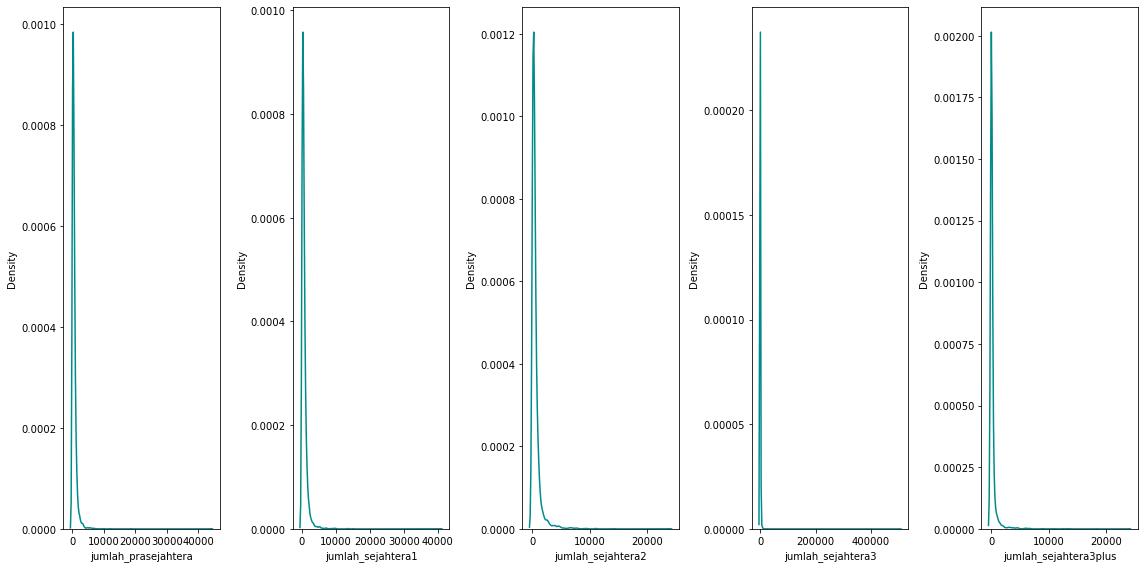

In [333]:
plt.figure(figsize=(16, 8))

for i, feature in enumerate(nums.columns):
    plt.subplot(1, len(nums.columns), i + 1)
    sns.kdeplot(nums[feature], color='darkcyan')
    plt.tight_layout()

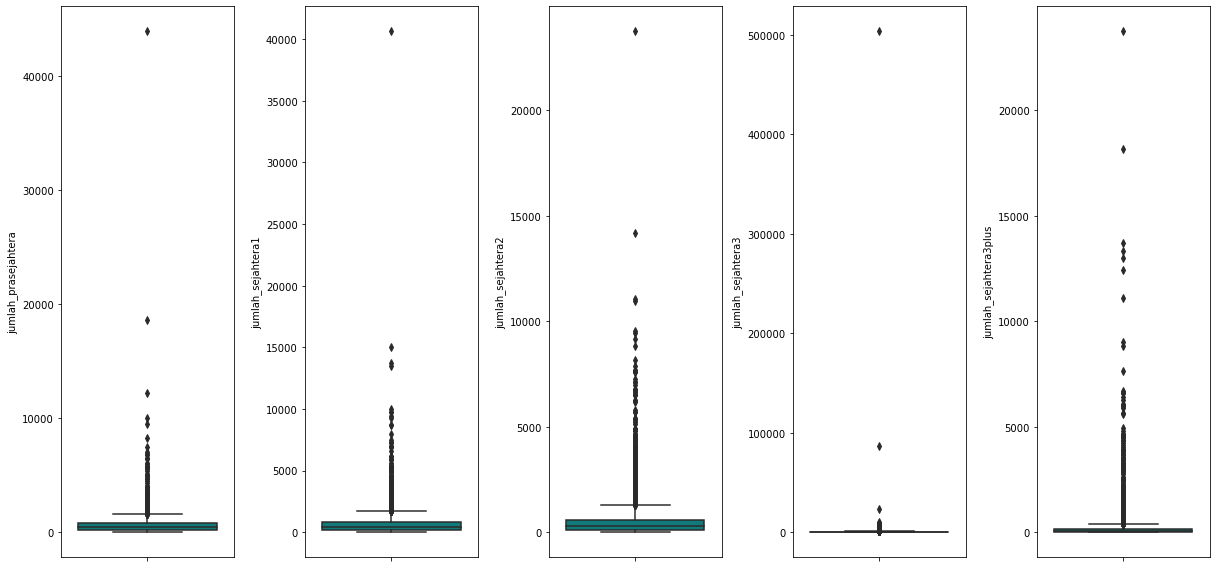

In [334]:
plt.figure(figsize=(17, 8))

for i, feature in enumerate(nums.columns):
    plt.subplot(1, len(nums.columns), i + 1)
    sns.boxplot(y=nums[feature], color='darkcyan', orient='v')
    plt.tight_layout()

In [335]:
# print(f' jumlah baris sebelum memfilter outlier: {len(df)}')

# Q1 = df['jumlah_prasejahtera'].quantile(0.25)
# Q3 = df['jumlah_prasejahtera'].quantile(0.75)
# IQR = Q3 - Q1
# low_limit = Q1 - (1.5 * IQR)
# high_limit = Q3 + (1.5 * IQR)
# filtered_entries = ((df['jumlah_prasejahtera'] >= low_limit) & (df['jumlah_prasejahtera'] <= high_limit))
# df = df[filtered_entries]

# print(f' jumlah baris sesudah memfilter outlier: {len(df)}')

In [336]:
# print(f' jumlah baris sebelum memfilter outlier: {len(df)}')

# Q1 = df['jumlah_sejahtera1'].quantile(0.25)
# Q3 = df['jumlah_sejahtera1'].quantile(0.75)
# IQR = Q3 - Q1
# low_limit = Q1 - (1.5 * IQR)
# high_limit = Q3 + (1.5 * IQR)
# filtered_entries1 = ((df['jumlah_sejahtera1'] >= low_limit) & (df['jumlah_sejahtera1'] <= high_limit))
# df = df[filtered_entries1]

# print(f' jumlah baris sesudah memfilter outlier: {len(df)}')

In [337]:
# print(f' jumlah baris sebelum memfilter outlier: {len(df)}')

# Q1 = df['jumlah_sejahtera2'].quantile(0.25)
# Q3 = df['jumlah_sejahtera2'].quantile(0.75)
# IQR = Q3 - Q1
# low_limit = Q1 - (1.5 * IQR)
# high_limit = Q3 + (1.5 * IQR)
# filtered_entries2 = ((df['jumlah_sejahtera2'] >= low_limit) & (df['jumlah_sejahtera2'] <= high_limit))
# df = df[filtered_entries2]

# print(f' jumlah baris sesudah memfilter outlier: {len(df)}')

In [338]:
# print(f' jumlah baris sebelum memfilter outlier: {len(df)}')

# Q1 = df['jumlah_sejahtera3'].quantile(0.25)
# Q3 = df['jumlah_sejahtera3'].quantile(0.75)
# IQR = Q3 - Q1
# low_limit = Q1 - (1.5 * IQR)
# high_limit = Q3 + (1.5 * IQR)
# filtered_entries3 = ((df['jumlah_sejahtera3'] >= low_limit) & (df['jumlah_sejahtera3'] <= high_limit))
# df = df[filtered_entries3]

# print(f' jumlah baris sesudah memfilter outlier: {len(df)}')

In [339]:
# print(f' jumlah baris sebelum memfilter outlier: {len(df)}')

# Q1 = df['jumlah_sejahtera3plus'].quantile(0.25)
# Q3 = df['jumlah_sejahtera3plus'].quantile(0.75)
# IQR = Q3 - Q1
# low_limit = Q1 - (1.5 * IQR)
# high_limit = Q3 + (1.5 * IQR)
# filtered_entries4 = ((df['jumlah_sejahtera3plus'] >= low_limit) & (df['jumlah_sejahtera3plus'] <= high_limit))
# df = df[filtered_entries4]

# print(f' jumlah baris sesudah memfilter outlier: {len(df)}')

In [340]:
# nums = df[['jumlah_prasejahtera','jumlah_sejahtera1', 'jumlah_sejahtera2', 'jumlah_sejahtera3', 'jumlah_sejahtera3plus']]

In [341]:
# plt.figure(figsize=(17, 8))

# for i, feature in enumerate(nums.columns):
#     plt.subplot(1, len(nums.columns), i + 1)
#     sns.boxplot(y=nums[feature], color='darkcyan', orient='v')
#     plt.tight_layout()

In [342]:
# # Define the mapping dictionary
# mapping_Tipologi = {
#     'Persawahan' : 0,
#     'Perindustrian/Jasa' : 1,
#     'Perladangan' : 2,
#     'Pesisir/Nelayan' : 3,
#     'Kehutanan ' : 4,
#     'Peternakan  ' : 5,
#     'Pertambangan' : 6,
#     'Perkebunan' : 7,
# }

# # Apply the mapping to the 'Tipologi' column in the DataFrame
# df['Tipologi'] = df['Tipologi'].map(mapping_Tipologi)

In [343]:
df.isnull().sum()

Tipologi                 0
jumlah_prasejahtera      0
jumlah_sejahtera1        0
jumlah_sejahtera2        0
jumlah_sejahtera3        0
jumlah_sejahtera3plus    0
dtype: int64

In [344]:
df2 = df.dropna()

In [345]:
df2.isnull().sum()

Tipologi                 0
jumlah_prasejahtera      0
jumlah_sejahtera1        0
jumlah_sejahtera2        0
jumlah_sejahtera3        0
jumlah_sejahtera3plus    0
dtype: int64

In [346]:
# df2['Tipologi'] = df2['Tipologi'].astype(int)

In [347]:
# split data
X = df2.drop(columns=['Tipologi'])
y = df2[['Tipologi']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [348]:
model = RandomForestClassifier()  # Instantiate the model
model.fit(X_train, y_train)  # Train the model

C:\Users\userr\AppData\Local\Temp\ipykernel_3320\4161544952.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)  # Train the model


RandomForestClassifier()

In [349]:
# LogisticRegression Hyperparameter Tuning
hyperparameterlr = {'penalty' : ['l1', 'l2'],
                    'C' : [0.0001, 0.001, 0.1, 0.02, 0.03, 0.01], 
                    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                   }

# DesicionTree Hyperparameter Tuning
hyperparameterdt = {'max_depth' : [int(x) for x in np.linspace(1, 100, num = 30)], # Maximum number of levels in tree, 
                    'min_samples_split' : [2, 5, 10, 100], # Minimum number of samples required to split a node, 
                    'min_samples_leaf' : [1, 2, 4, 10, 20, 50], # Minimum number of samples required at each leaf node,
                    'max_features' : ['auto', 'sqrt','log2'] # Number of features to consider at every split
                    }

# RandomForest Hyperparameter Tuning
hyperparameterrf = {'n_estimators' : [int(x) for x in np.linspace(1, 10, num = 10)],
                    'max_depth' : [int(x) for x in np.linspace(1, 10, num = 3)], # Maximum number of levels in tree
                    'min_samples_split' : [int(x) for x in np.linspace(1, 40, num = 30)], # Minimum number of samples required to split a node
                    'min_samples_leaf' : [int(x) for x in np.linspace(1, 20, num = 30)], # Minimum number of samples required at each leaf node
                    'max_features' : ['auto', 'sqrt','log2'], # Number of features to consider at every split
                    'criterion' : ['gini', 'entropy']
                   }

# K-Nearest Neighbors Hyperparameter Tuning]
hyperparameterkn = {'leaf_size' : list(range(1,50)),
                    'n_neighbors' : list(range(1,30)),
                    'p' : [1,2]
                   }

# Gaussian Naive Bayes Hyperparameter Tuning
hyperparameterNB = {'var_smoothing' : [int(x) for x in np.linspace(0,100, num=10)] 
                   }

# Gradient Boosting hyperparameter Tuning
hyperparametergb = {'n_estimators' : [2,6,8,10],
                    'max_depth' : [int(x) for x in np.linspace(1, 100, num = 5)], # Maximum number of levels in tree
                    'learning_rate' : [0.01,0.1,1,10]
                   }

In [350]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid for your chosen model
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    # Add more hyperparameters specific to your model
}

# Instantiate the model and the RandomizedSearchCV
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3 = GradientBoostingClassifier()
model4 = GaussianNB()
model5 = RandomForestClassifier()

random_search1 = RandomizedSearchCV(model1, param_distributions=hyperparameterdt, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search2 = RandomizedSearchCV(model2, param_distributions=hyperparameterkn, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search3 = RandomizedSearchCV(model3, param_distributions=hyperparametergb, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search4 = RandomizedSearchCV(model4, param_distributions=hyperparameterNB, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search5 = RandomizedSearchCV(model5, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the model with hyperparameter tuning to the training data
random_search1.fit(X_train, y_train)
random_search2.fit(X_train, y_train)
random_search3.fit(X_train, y_train)
random_search4.fit(X_train, y_train)
random_search5.fit(X_train, y_train)

# Get the best model with optimized hyperparameters
best_model1 = random_search1.best_estimator_
best_model1.fit(X_train, y_train)

best_model2 = random_search2.best_estimator_
best_model2.fit(X_train, y_train)

best_model3 = random_search3.best_estimator_
best_model3.fit(X_train, y_train)

best_model4 = random_search4.best_estimator_
best_model4.fit(X_train, y_train)

best_model5 = random_search5.best_estimator_
best_model5.fit(X_train, y_train)

C:\Users\userr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\userr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\userr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\userr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\userr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:19

RandomForestClassifier(max_depth=10, n_estimators=200)

In [360]:
print('==========================================')
print('DecisionTreeClassifier()')
pred = best_model1.predict(X_test)

accuracy = accuracy_score(y_test, pred)
confusion = confusion_matrix(y_test, pred)
classification_rep = classification_report(y_test, pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_rep)

print('==========================================')
print('KNeighborsClassifier()')
pred = best_model2.predict(X_test)

accuracy = accuracy_score(y_test, pred)
confusion = confusion_matrix(y_test, pred)
classification_rep = classification_report(y_test, pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_rep)

print('==========================================')
print('GradientBoostingClassifier()')
pred = best_model3.predict(X_test)

accuracy = accuracy_score(y_test, pred)
confusion = confusion_matrix(y_test, pred)
classification_rep = classification_report(y_test, pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_rep)

print('==========================================')
print('GaussianNB()')
pred = best_model4.predict(X_test)

accuracy = accuracy_score(y_test, pred)
confusion = confusion_matrix(y_test, pred)
classification_rep = classification_report(y_test, pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_rep)

print('==========================================')
print('RandomForestClassifier()')
pred = best_model5.predict(X_test)

accuracy = accuracy_score(y_test, pred)
confusion = confusion_matrix(y_test, pred)
classification_rep = classification_report(y_test, pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_rep)

DecisionTreeClassifier()
Accuracy: 0.7206703910614525
Classification Report:
                     precision    recall  f1-score   support

         Kehutanan       0.00      0.00      0.00         9
Perindustrian/Jasa       0.71      0.42      0.52       286
        Perkebunan       0.00      0.00      0.00         3
       Perladangan       0.00      0.00      0.00       126
        Persawahan       0.72      0.96      0.83       948
      Pertambangan       0.00      0.00      0.00         6
   Pesisir/Nelayan       0.00      0.00      0.00        47
        Peternakan       0.00      0.00      0.00         7

          accuracy                           0.72      1432
         macro avg       0.18      0.17      0.17      1432
      weighted avg       0.62      0.72      0.65      1432

KNeighborsClassifier()
Accuracy: 0.7206703910614525
Classification Report:
                     precision    recall  f1-score   support

         Kehutanan       0.00      0.00      0.00         9
Pe

C:\Users\userr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\userr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\userr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\userr\anaconda3\lib\site-packages\sklearn\metr

Accuracy: 0.6620111731843575
Classification Report:
                     precision    recall  f1-score   support

         Kehutanan       0.00      0.00      0.00         9
Perindustrian/Jasa       0.00      0.00      0.00       286
        Perkebunan       0.00      0.00      0.00         3
       Perladangan       0.00      0.00      0.00       126
        Persawahan       0.66      1.00      0.80       948
      Pertambangan       0.00      0.00      0.00         6
   Pesisir/Nelayan       0.00      0.00      0.00        47
        Peternakan       0.00      0.00      0.00         7

          accuracy                           0.66      1432
         macro avg       0.08      0.12      0.10      1432
      weighted avg       0.44      0.66      0.53      1432

RandomForestClassifier()
Accuracy: 0.7199720670391061
Classification Report:
                     precision    recall  f1-score   support

         Kehutanan       0.00      0.00      0.00         9
Perindustrian/Jasa       

C:\Users\userr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\userr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\userr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\userr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


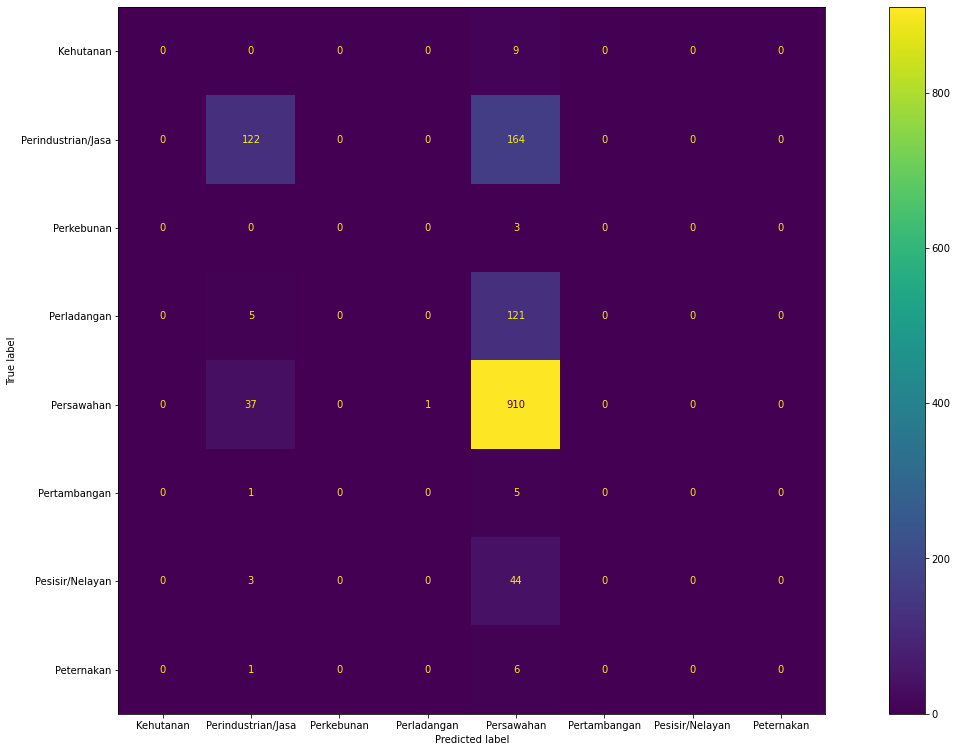

Precision per class:
Class 0: 0.0
Class 1: 0.6978021978021978
Class 2: 0.0
Class 3: 0.0
Class 4: 0.7237790232185749
Class 5: 0.0
Class 6: 0.0
Class 7: 0.0
Weighted Precision: 0.6185153230325681
Accuracy: 0.7199720670391061
Confusion Matrix:
 [[  0   0   0   0   9   0   0   0]
 [  0 127   0   0 159   0   0   0]
 [  0   0   0   0   3   0   0   0]
 [  0   8   0   0 118   0   0   0]
 [  0  43   0   1 904   0   0   0]
 [  0   1   0   0   5   0   0   0]
 [  0   2   0   0  45   0   0   0]
 [  0   1   0   0   6   0   0   0]]
Classification Report:
                     precision    recall  f1-score   support

         Kehutanan       0.00      0.00      0.00         9
Perindustrian/Jasa       0.70      0.44      0.54       286
        Perkebunan       0.00      0.00      0.00         3
       Perladangan       0.00      0.00      0.00       126
        Persawahan       0.72      0.95      0.82       948
      Pertambangan       0.00      0.00      0.00         6
   Pesisir/Nelayan       0.00   

C:\Users\userr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\userr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\userr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\userr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:131

In [364]:
from sklearn.metrics import plot_confusion_matrix
# Create a figure with a custom size
fig, ax = plt.subplots(figsize=(23, 13))

# Plot the confusion matrix
plot_confusion_matrix(best_model2, X_test, y_test, ax=ax)

# Show the plot
plt.show()

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pred = best_model5.predict(X_test)

# Calculate precision for each class and the weighted average
precision_per_class = precision_score(y_test, pred, average=None)
weighted_precision = precision_score(y_test, pred, average='weighted')

print("Precision per class:")
for i, score in enumerate(precision_per_class):
    print(f"Class {i}: {score}")

print(f"Weighted Precision: {weighted_precision}")

accuracy = accuracy_score(y_test, pred)
confusion = confusion_matrix(y_test, pred)
classification_rep = classification_report(y_test, pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', classification_rep)